In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd

## Set up connection through Strava API

In [5]:


response = requests.post(
    url='https://www.strava.com/oauth/token',
    data={
        'client_id': client_id,
        'client_secret': client_secret,
        'code': code,
        'grant_type': 'authorization_code'
    }
)
response_data = response.json()
access_token = response_data['access_token']

print(response_data)

{'token_type': 'Bearer', 'expires_at': 1720196053, 'expires_in': 19427, 'refresh_token': 'bb413a7acdb72c6425ddebaeb9eba5942fa2c970', 'access_token': '5fc3dc03bd96c5bf3e4a1b0a7a3eada129d9eaac', 'athlete': {'id': 77466263, 'username': 'wsik_kuba', 'resource_state': 2, 'firstname': 'Jakub', 'lastname': 'Wąsik', 'bio': None, 'city': None, 'state': None, 'country': None, 'sex': 'M', 'premium': False, 'summit': False, 'created_at': '2021-01-31T14:35:35Z', 'updated_at': '2024-01-05T18:49:32Z', 'badge_type_id': 0, 'weight': 82.0, 'profile_medium': 'https://dgalywyr863hv.cloudfront.net/pictures/athletes/77466263/28433767/2/medium.jpg', 'profile': 'https://dgalywyr863hv.cloudfront.net/pictures/athletes/77466263/28433767/2/large.jpg', 'friend': None, 'follower': None}}


In [6]:
headers = {
    'Authorization': f'Bearer {access_token}'
}
activities_url = "https://www.strava.com/api/v3/athlete/activities"
response = requests.get(activities_url, headers=headers)
activities = response.json()

df = pd.DataFrame(activities)

## Data preview

In [7]:
df_running = df[df['type'] == 'Run']
df_riding = df[df['type'] == 'Ride']

In [45]:
df_running.head(4)

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,...,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,average_watts,kilojoules,device_watts,average_temp,pace_min_km
0,2,"{'id': 77466263, 'resource_state': 1}",Evening Run,11230.4,3914,4130,32.0,Run,Run,0.0,...,stripped_416E0440-F756-4124-985D-7167CB844DFE-...,False,2,0,False,NaN,NaN,NaN,NaN,5.808638
1,2,"{'id': 77466263, 'resource_state': 1}",Evening Run,10877.8,4188,4547,51.2,Run,Run,0.0,...,stripped_B81C9537-D1FC-4A84-A52B-047FE89137FB-...,False,1,1,False,NaN,NaN,NaN,NaN,6.416739
2,2,"{'id': 77466263, 'resource_state': 1}",Night Run,8301.7,3264,3340,15.4,Run,Run,0.0,...,stripped_A56648E2-8231-4F12-94C3-785A528798DD-...,False,0,0,False,NaN,NaN,NaN,NaN,6.552875
3,2,"{'id': 77466263, 'resource_state': 1}",Night Run,5651.1,1724,1735,10.0,Run,Run,0.0,...,stripped_81119AE2-58C1-4342-9BED-B34F7312B464-...,False,0,0,False,NaN,NaN,NaN,NaN,5.084556


## Basic plot for running and cycling

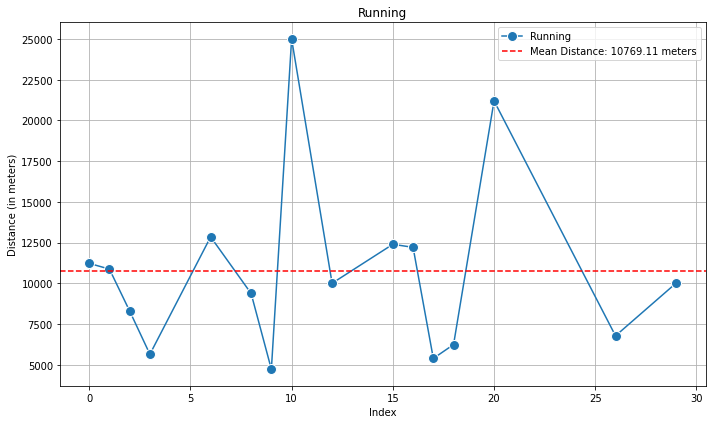

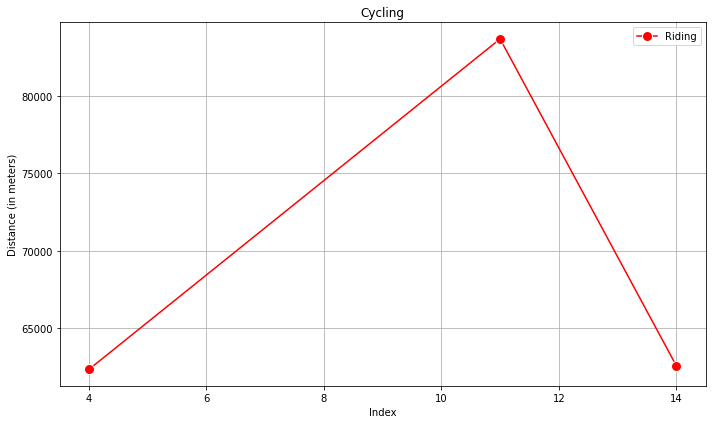

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(df_running.index, df_running['distance'], marker='o', markersize=10, markeredgecolor='w', linestyle='-', label='Running')

mean_running_distance = df_running['distance'].mean()

plt.axhline(y=mean_running_distance, color='red', linestyle='--', label=f'Mean Distance: {mean_running_distance:.2f} meters')

plt.title('Running')
plt.xlabel('Index')
plt.ylabel('Distance (in meters)')

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_riding.index, df_riding['distance'], marker='o', markersize=10, markeredgecolor='w', linestyle='-', color='red', label='Riding')

plt.title('Cycling')
plt.xlabel('Index')
plt.ylabel('Distance (in meters)')

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

## Pace and distance plot for running

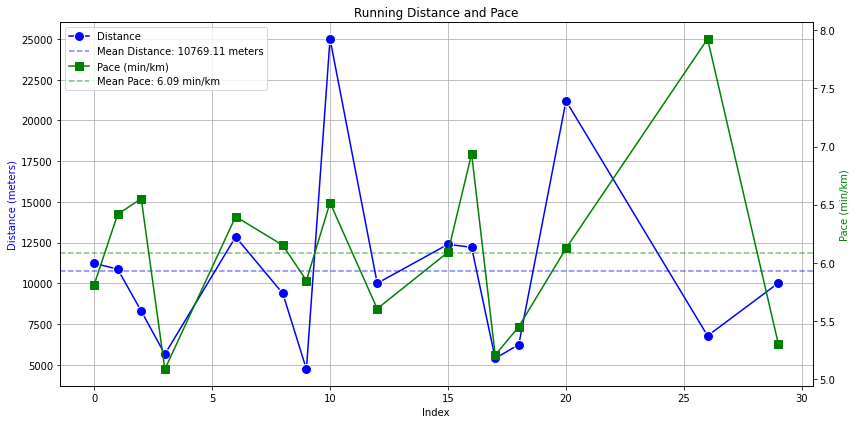

In [69]:
df_running['distance'] = pd.to_numeric(df_running['distance'], errors='coerce')
df_running['moving_time'] = pd.to_numeric(df_running['moving_time'], errors='coerce')

df_running['pace_min_km'] = df_running['moving_time'] / (df_running['distance'] / 1000) / 60

mean_running_distance = df_running['distance'].mean()
mean_running_pace = df_running['pace_min_km'].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_running.index, df_running['distance'], marker='o', markersize=10, markeredgecolor='w', linestyle='-', label='Distance', color='blue')

ax1.axhline(y=mean_running_distance, color='blue', linestyle='--', alpha=0.5, label=f'Mean Distance: {mean_running_distance:.2f} meters')

ax2 = ax1.twinx()
ax2.plot(df_running.index, df_running['pace_min_km'], marker='s', markersize=8, linestyle='-', label='Pace (min/km)', color='green')

ax2.axhline(y=mean_running_pace, color='green', linestyle='--', alpha=0.5, label=f'Mean Pace: {mean_running_pace:.2f} min/km')

ax1.set_xlabel('Index')
ax1.set_ylabel('Distance (meters)', color='blue')
ax2.set_ylabel('Pace (min/km)', color='green')
plt.title('Running Distance and Pace')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

ax1.grid(True)
plt.tight_layout()

pd.options.mode.chained_assignment = None  # default='warn'

plt.show()


## Running distance distibution

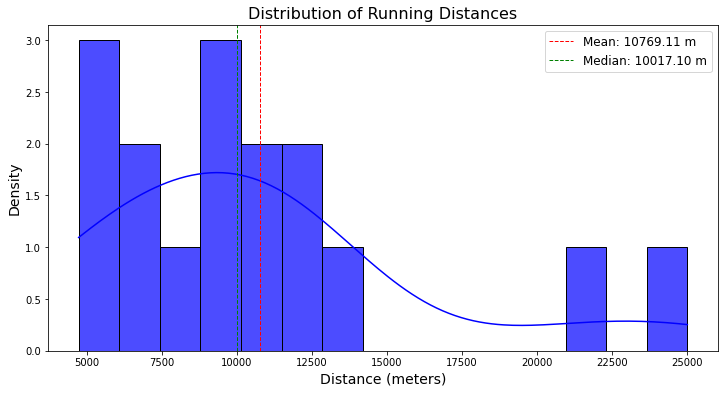

In [47]:
plt.figure(figsize=(12, 6))
ax = plt.gca()

sns.histplot(df_running['distance'], bins=15, kde=True, color='blue', alpha=0.7, ax=ax)

plt.title('Distribution of Running Distances', fontsize=16)
plt.xlabel('Distance (meters)', fontsize=14)
plt.ylabel('Density', fontsize=14)

mean_distance = df_running['distance'].mean()
median_distance = df_running['distance'].median()

plt.axvline(mean_distance, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_distance:.2f} m')
plt.axvline(median_distance, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_distance:.2f} m')

plt.legend(fontsize=12)

plt.show()

In [68]:
df_running['distance'] = pd.to_numeric(df_running['distance'], errors='coerce')
df_running['moving_time'] = pd.to_numeric(df_running['moving_time'], errors='coerce')

df_running['pace_min_km'] = df_running['moving_time'] / (df_running['distance'] / 1000) / 60

pd.options.mode.chained_assignment = None  # default='warn'


## Best efforts

In [66]:
def get_best_effort(df, target_distance):
    tolerance = 300  

    filtered_df = df[(df['distance'] >= target_distance - tolerance) & (df['distance'] <= target_distance + tolerance)]

    if len(filtered_df) > 0:
        min_time = filtered_df['moving_time'].min()
        best_effort_minutes = min_time / 60.0  # Convert to minutes
        return best_effort_minutes
    else:
        return None

distances = {
    '10km': 10000,
    '5km': 5000,
    'Half-marathon': 21097.5,
    'Marathon': 42195  
}

pd.options.mode.chained_assignment = None 

for label, dist in distances.items():
    best_effort = get_best_effort(df_running, dist)
    if best_effort is not None:
        print(f"Best effort for {label}: {best_effort:.2f} minutes")
    else:
        print(f"No data found within tolerance range for {label}. Defaulting to N/A or 0 minutes.")

Best effort for 10km: 53.15 minutes
Best effort for 5km: 27.65 minutes
Best effort for Half-marathon: 129.85 minutes
No data found within tolerance range for Marathon. Defaulting to N/A or 0 minutes.


## Sum of my efforts

In [70]:
# Calculate total number of exercises
total_exercises = len(df_running)

# Calculate total time in minutes
total_time_minutes = df_running['moving_time'].sum() / 60.0  # Convert seconds to minutes

# Calculate total distance in kilometers
total_distance_km = df_running['distance'].sum() / 1000.0  # Convert meters to kilometers

# Print summary
print(f"Summary of Exercises:")
print(f"Total number of exercises: {total_exercises}")
print(f"Total time spent: {total_time_minutes:.2f} minutes")
print(f"Total distance covered: {total_distance_km:.2f} kilometers")

Summary of Exercises:
Total number of exercises: 16
Total time spent: 1064.00 minutes
Total distance covered: 172.31 kilometers


## VO2 max

In [9]:
def estimate_vo2max(distance_meters, time_minutes):
    vo2max_estimate = (distance_meters / 1000.0 / time_minutes) + 3.5  

    return vo2max_estimate

# Example usage:
distance = 10000  
time = 53.1  

estimated_vo2max = estimate_vo2max(distance, time)
print(f"Estimated VO2 max: {estimated_vo2max:.2f} ml/kg/min")


Estimated VO2 max: 3.69 ml/kg/min
